In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('quarterly_returns.csv')

In [3]:
df.dtypes

年份         int64
分组         int64
季度         int64
加权回报率    float64
月份        object
dtype: object

In [4]:

# 确保年份和季度的数据类型正确
df['年份'] = df['年份'].astype(str)
df['季度'] = df['季度'].astype(str)

# 创建一个新列'Year_Quarter'来合并年份和季度，并确保按照正确的时间顺序排序
df['Year_Quarter'] = df['年份'] + 'Q' + df['季度']
df['Date'] = df['年份'] + '-' + df['季度'] + '-01' 

df['Date'] = pd.to_datetime(df['Date'])

# 计算每个分组的加权回报率累计和，并将累积回报率的初始值设为1
df['Cumulative_Return'] = df.groupby('分组')['加权回报率'].cumsum() + 1

# 对数据进行排序，确保图形的横轴按照年份和季度的顺序排列
df.sort_values(by=['Date'], inplace=True)



In [5]:
# 筛选出2014年第四季度及之后的数据
#df = df[df['Year_Quarter'] >= '2014Q4']
df = df[(df['Date'] >= '2014-10-01')]

In [6]:
df.dtypes

年份                           object
分组                            int64
季度                           object
加权回报率                       float64
月份                           object
Year_Quarter                 object
Date                 datetime64[ns]
Cumulative_Return           float64
dtype: object

In [7]:
df.to_csv('./final-dataset.csv', index=False)

In [8]:
# 获取分组列表
groups = df['分组'].unique()


In [10]:
group_data['Year_Quarter']

173    2014Q12
186     2015Q4
187     2015Q8
188    2015Q12
201     2016Q4
202     2016Q8
203    2016Q12
216     2017Q4
217     2017Q8
218    2017Q12
231     2018Q4
232     2018Q8
233    2018Q12
246     2019Q4
247     2019Q8
248    2019Q12
261     2020Q4
262     2020Q8
263    2020Q12
276     2021Q4
277     2021Q8
278    2021Q12
291     2022Q4
292     2022Q8
293    2022Q12
306     2023Q4
307     2023Q8
308    2023Q12
Name: Year_Quarter, dtype: object

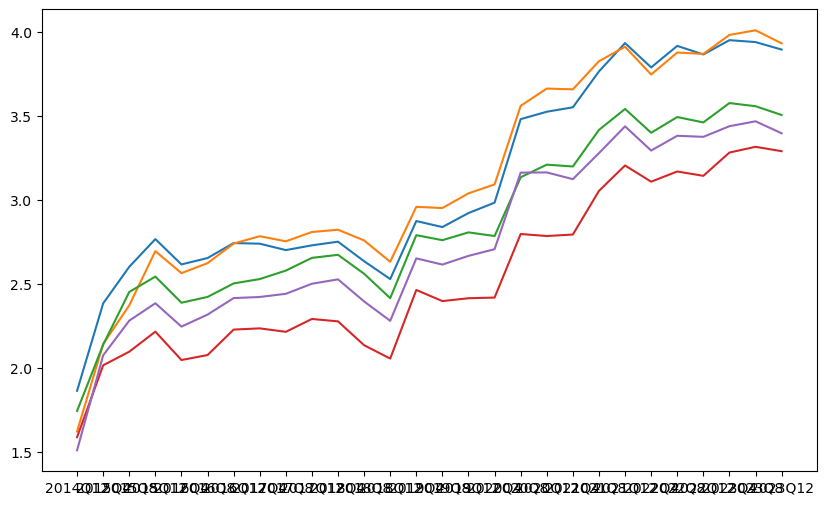

In [9]:

# 绘制每个分组的累计回报率折线图
plt.figure(figsize=(10, 6))

for group in groups:
    group_data = df[df['分组'] == group]
    plt.plot(group_data['Year_Quarter'], group_data['Cumulative_Return'], label=group)

In [ ]:

# 设置y轴起始值为1
plt.ylim(bottom=1)

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Cumulative Weighted Returns by Group')
plt.xlabel('Year and Quarter')
plt.ylabel('Cumulative Weighted Return')

# 旋转x轴标签，以便它们更容易阅读
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()
plt.show()